# OTOC oscillations in open quantum systems

In [1]:
from lindblad_otoc import LindbladOTOC
import numpy as np
import matplotlib.pyplot as plt

We consider the following Hamiltonian:

$H = -J \sum_i \sigma_i^z \sigma_{i+1}^z + h_x\sum_i \sigma_i^x  + h_z \sum_i \sigma_i^z $

In the inifinite temperature limit, the OTOC for the spin chain is given by: 

$C^{\mu\nu}_{ij}(t) = \frac{1}{2}<[\sigma^{\mu}_i(t),\sigma^{\nu}_j]^2> = 1-Re\{Tr[\sigma^{\mu}_i(t)\sigma^{\nu}_j\sigma^{\mu}_i(t)\sigma^{\nu}_j]\}/D$,

where $D$ is the dimension of the Hilbert space.

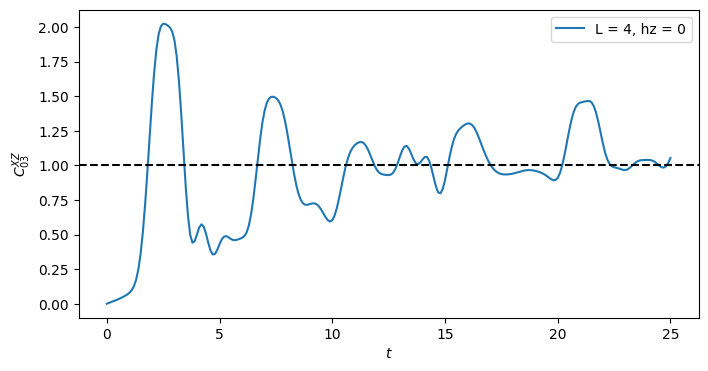

In [13]:
otoc = LindbladOTOC.init(L=4, J=1, hz=0, hx=1, mu='X', nu='Z', i=0, j=3,T=25, tstep=0.1, Dt=30, init_state=0, 
    dissipator='boundary_amp_damp', gamma=0.05)

otoc.analysis()
otoc.plot_otoc()

In [ ]:
gammas = [1e-3, 3e-3, 1e-2, 3e-2, 1e-1]
stds = []
for g in gammas:
    ot = LindbladOTOC.init(
        L=4, J=1, hz=, hx=hx,
        mu='Z', nu='Z', i=0, j=3,
        T=25.0, tstep=0.1, Dt=20.0,
        init_state="thermal", state_param=10.0,
        dissipator='boundary_dephasing_z', gamma=g
    )
    ot.analysis()
    stds.append(ot.std)

print(list(zip(gammas, stds)))

plt.figure()
plt.semilogx(gammas, stds, marker='o')
plt.xlabel('gamma (dephasing rate)')
plt.ylabel('late-time std (Fortes)')
plt.title('Gamma sweep: boundary dephasing Z')
plt.show()

In [ ]:
curves = {}
labels = [
    ('boundary_dephasing_z', {'gamma':0.03}),
    ('bulk_dephasing_z', {'gamma':0.03}),
    ('bulk_x_dephasing', {'gamma':0.03}),
]

for name, kwargs in labels:
    ot = LindbladOTOC(
        L=L, J=J, hz=hz, hx=hx,
        mu='Z', nu='Z', i=0, j=3,
        T=25.0, tstep=0.1, Dt=20.0,
        init_state="thermal", state_param=10.0,
        dissipator=name, **kwargs
    )
    ot.analysis()
    curves[name] = (ot.tlist, ot.normalized_otoc_list)

plt.figure()
for name in curves:
    t, y = curves[name]
    plt.plot(t, y, label=name)
plt.xlabel('t')
plt.ylabel('normalized OTOC')
plt.title('Dissipator comparison (same rate)')
plt.legend()
plt.show()

In [ ]:
ot = LindbladOTOC(
    L=L, J=J, hz=hz, hx=hx,
    mu='Z', nu='Z', i=0, j=3,
    T=25.0, tstep=0.1, Dt=20.0,
    init_state="thermal", state_param=10.0,
    dissipator='boundary_amp_damp', kappa=0.05, n_th=0.2
)

ot.analysis()
print('late-time std (amp-damp):', ot.std)

plt.figure()
plt.plot(ot.tlist, ot.normalized_otoc_list)
plt.xlabel('t')
plt.ylabel('normalized OTOC')
plt.title('Boundary amplitude damping (kappa=0.05, n_th=0.2)')
plt.show()